In [ ]:
#Question 1 : What is the fundamental idea behind ensemble techniques? How doesbagging differ from boosting in terms of approach and objective?
'''Fundamental Idea Behind Ensemble Techniques:
The core idea of ensemble learning is to combine multiple individual models (often called base learners or weak learners) to create a stronger overall
model that achieves better performance, stability, and generalization than any single model alone.

Ensembles reduce variance, bias, or both, depending on how they are constructed.

Difference Between Bagging and Boosting
| Aspect                 |   Bagging (Bootstrap Aggregating)                                                     |   Boosting                                                                                  |
| ---------------------- | ------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------- |
| **Objective**          | Reduce **variance** and prevent overfitting                                           | Reduce **bias** and improve weak learners                                                   |
| **Approach**           | Trains multiple models **independently** on random subsets of data (with replacement) | Trains models **sequentially**, where each model focuses on errors made by the previous one |
| **Data Sampling**      | Uses **bootstrap samples** (random samples with replacement)                          | Uses the **entire dataset** but assigns **higher weights** to misclassified samples         |
| **Model Combination**  | Averages (for regression) or votes (for classification)                               | Combines models using **weighted voting** or **additive modeling**                          |
| **Example Algorithms** | Random Forest, Bagged Decision Trees                                                  | AdaBoost, Gradient Boosting, XGBoost, LightGBM                                              |

In summary:
Bagging → reduces variance by training multiple independent models in parallel.
Boosting → reduces bias by training models sequentially, focusing on improving weak learners.'''



In [ ]:
#Question 2: Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.
'''A single decision tree tends to overfit because it learns every detail and noise from the training data, resulting in high variance and poor 
generalization to unseen data.

A Random Forest Classifier, on the other hand, reduces overfitting by combining predictions from many decision trees, each trained on slightly 
different data and features.
This ensemble averaging smooths out noise and variance, leading to a more robust and generalized model.

Key Mechanisms That Reduce Overfitting

Bootstrap Sampling (Bagging):
Each tree is trained on a random subset of the training data (sampled with replacement).
→ This introduces diversity among trees and prevents them from memorizing the same patterns.

Random Feature Selection:
At each split, the algorithm randomly selects only a subset of features to consider.
→ This reduces correlation between trees, further improving generalization.

Two Key Hyperparameters
| **Hyperparameter** | **Role in Reducing Overfitting**                                                                                                                            |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `n_estimators`     | Number of trees in the forest. More trees → better averaging → lower variance and reduced overfitting (up to a limit).                                      |
| `max_features`     | Controls how many features are considered when splitting a node. Smaller values → more randomness → less correlation between trees → better generalization. |

In summary:
Random Forest reduces overfitting by combining multiple diverse, weakly correlated trees through bagging and random feature selection.
Key hyperparameters like n_estimators and max_features help control this diversity and improve the model’s robustness.
'''

In [ ]:
#Question 3: What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.
'''Stacking (Stacked Generalization) is an ensemble technique that combines multiple different machine learning models (called base learners) and uses
another model (called a meta-learner) to learn how to best combine their predictions.

Instead of simple averaging or voting (as in bagging or boosting), stacking learns how to optimally weight and blend the outputs of diverse models.

How Stacking Works

Train several base models (e.g., Decision Tree, SVM, Logistic Regression) on the same training data.

Collect the predictions of these base models.

Use these predictions as inputs (features) to train a meta-model (e.g., Linear Regression or another classifier).

The meta-model learns to combine the base models’ outputs to make the final prediction.

How Stacking Differs from Bagging and Boosting
| **Aspect**             | **Bagging**                                     | **Boosting**                               | **Stacking**                            |
| ---------------------- | ----------------------------------------------- | ------------------------------------------ | --------------------------------------- |
| **Model Type**         | Same type of models (e.g., many decision trees) | Same type, trained sequentially            | Different types of models combined      |
| **Training Process**   | Parallel (independent models)                   | Sequential (each corrects previous errors) | Two-layer process (base + meta learner) |
| **Combination Method** | Averaging or voting                             | Weighted combination based on performance  | Meta-model learns optimal combination   |
| **Goal**               | Reduce variance                                 | Reduce bias                                | Combine strengths of diverse models     |

Simple Example Use Case

 Example:
Predicting whether a customer will default on a loan.

Base models: Logistic Regression, Random Forest, and Gradient Boosting.

Meta-model: A simple Linear Regression or Neural Network trained on the predictions of the base models.

The meta-model learns which base model performs better in which situations, leading to higher accuracy and robustness than any single model alone.

In summary:
Stacking is a powerful ensemble technique that combines different models using a meta-learner to make better predictions, unlike bagging 
(parallel averaging) or boosting (sequential correction).'''

In [ ]:
#Question 4:What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?
'''The Out-of-Bag (OOB) Score is an internal validation metric used in Random Forests to estimate the model’s performance without needing a separate 
validation or test set.

During training, each decision tree in the forest is trained on a bootstrap sample (a random sample with replacement from the training data).
This means that roughly one-third (≈ 33%) of the data is not used to train a given tree — these unused samples are called Out-of-Bag samples.

How the OOB Score Works

For each tree:

Train it on its bootstrap sample.

The remaining data points (OOB samples) are left out.

After all trees are trained:

Each data point is predicted only by the trees that did not see it during training.

Compare these OOB predictions with the actual labels to compute the OOB accuracy (or error).

Why the OOB Score is Useful

It provides a built-in, unbiased estimate of the model’s generalization performance.

No need for a separate validation set, so more data can be used for training.

Saves time and computational resources compared to techniques like cross-validation.

How It Helps in Model Evaluation

The OOB score acts as a proxy for test accuracy, showing how well the model is likely to perform on unseen data.

It helps in tuning hyperparameters (like n_estimators or max_features) without splitting the dataset multiple times.

In summary:
The OOB Score is an internal cross-validation measure in Random Forests that estimates model performance using data left out of each tree’s training 
sample.
It’s useful because it evaluates model accuracy without requiring a separate validation set, making the process efficient and data-friendly.'''

In [ ]:
#Question 5: Compare AdaBoost and Gradient Boosting in terms of:
#● How they handle errors from weak learners
#● Weight adjustment mechanism
#● Typical use cases
'''Comparison Between AdaBoost and Gradient Boosting
Both AdaBoost and Gradient Boosting are boosting algorithms, meaning they build models sequentially, with each new model trying to correct the errors 
of the previous ones.
However, they differ in how they handle errors, adjust weights, and their typical applications.

1. How They Handle Errors from Weak Learners
| **Aspect**           | **AdaBoost (Adaptive Boosting)**                                                                                               | **Gradient Boosting**                                                                                                                                   |
| -------------------- | ------------------------------------------------------------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Error Handling**   | Focuses more on **misclassified samples** — increases their weights so that the next weak learner pays more attention to them. | Focuses on **residual errors** — the next learner tries to predict the difference (residual) between the true value and the current model’s prediction. |
| **Learning Process** | Sequentially corrects classification mistakes.                                                                                 | Sequentially reduces prediction errors (for regression or classification).                                                                              |
| **Model Type**       | Commonly uses **Decision Stumps** (1-level trees).                                                                             | Commonly uses **Deeper Decision Trees** as base learners.                                                                                               |

2. Weight Adjustment Mechanism
| **Aspect**         | **AdaBoost**                                                                                                                                                  | **Gradient Boosting**                                                                                                                  |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------- |
| **Sample Weights** | Each training sample has a weight. After each iteration, weights of **misclassified samples are increased**, and **correctly classified ones are decreased**. | Does **not assign weights to samples**; instead, it fits the next learner to the **residual errors (gradients)** of the loss function. |
| **Model Weights**  | Each weak learner is given a weight based on its accuracy (better models get higher weights).                                                                 | Each learner contributes to the final prediction using a **learning rate (shrinkage parameter)** that scales its influence.            |

3. Typical Use Cases
| **Algorithm**         | **Common Use Cases**                                                                                                                                                           |
| --------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **AdaBoost**          | Works well with clean, less noisy datasets. Often used for **binary classification**, **face detection**, and **spam filtering**.                                              |
| **Gradient Boosting** | More flexible and powerful; used for **regression**, **multi-class classification**, and large-scale structured data problems (e.g., **XGBoost**, **LightGBM**, **CatBoost**). |

In Summary:
| **Aspect**    | **AdaBoost**                      | **Gradient Boosting**                         |
| ------------- | --------------------------------- | --------------------------------------------- |
| Focus         | Misclassified samples             | Residual errors                               |
| Weight Update | Increases weights of hard samples | Fits new model to minimize loss               |
| Base Learner  | Usually shallow trees (stumps)    | Usually deeper trees                          |
| Loss Function | Exponential loss                  | Any differentiable loss (e.g., MSE, log-loss) |
| Use Case      | Simple, clean datasets            | Complex, large datasets                       |
'''

In [ ]:
#Question 6:Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.
'''CatBoost (short for Categorical Boosting) is a gradient boosting algorithm developed by Yandex that is specifically designed to handle categorical 
(non-numeric) features efficiently.
Unlike most other boosting algorithms (like XGBoost or LightGBM), it doesn’t require manual encoding such as one-hot or label encoding.

Key Reason for Strong Performance on Categorical Data

CatBoost uses a special technique called “Ordered Target Statistics” (or Ordered Encoding) to convert categorical features into numerical form without data leakage and while preserving information about the target variable.

How CatBoost Handles Categorical Variables

Ordered Target Encoding:

Instead of replacing a category with the mean target value (which can cause target leakage), CatBoost computes the encoding in an ordered way — using only the part of the data seen before the current example during training.

For example, for a feature like City, CatBoost replaces each category (like “Delhi”, “Mumbai”, “Chennai”) with a value derived from the average target for that city, computed using earlier examples.

Formula (simplified):

Encoded Value=Sum of target values for category (previous rows)+prior/Count of category (previous rows)+1
This prevents the model from “peeking” at future data.

Combinations of Categorical Features:

CatBoost also automatically creates combinations (interactions) between categorical features to capture more complex relationships.

Efficient Encoding During Training:

The encoding happens internally and dynamically during training, so no manual preprocessing or one-hot encoding is required.

Why This Matters

Prevents target leakage (common in naive target encoding).

Reduces overfitting by using ordered statistics and priors.

Saves time since you don’t need to preprocess categorical variables manually.

Performs better on datasets with many categorical columns (like customer data, text categories, etc.).'''

In [1]:
#Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization
#Task:
#1. Load the Wine dataset (sklearn.datasets.load_wine()).
#2. Split data into 70% train and 30% test.
#3. Train a KNN classifier (default K=5) without scaling and evaluate using:
#a. Accuracy
#b. Precision, Recall, F1-Score (print classification report)
#4. Apply StandardScaler, retrain KNN, and compare metrics.
#5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric(Euclidean, Manhattan).
#6. Train the optimized KNN and compare results with the unscaled/scaled versions.
# Step 1: Import Libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load the Wine Dataset
data = load_wine()
X = data.data
y = data.target

# Step 3: Split into 70% Train and 30% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Train KNN without Scaling (Default K=5)
knn_unscaled = KNeighborsClassifier(n_neighbors=5)
knn_unscaled.fit(X_train, y_train)
y_pred_unscaled = knn_unscaled.predict(X_test)

# Evaluate
print("🔹 Without Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_unscaled))
print("Classification Report:\n", classification_report(y_test, y_pred_unscaled))

# Step 5: Apply StandardScaler and Retrain
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

# Evaluate
print("\n🔹 With Standard Scaling:")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Classification Report:\n", classification_report(y_test, y_pred_scaled))

# Step 6: Use GridSearchCV to Optimize K and Distance Metric
param_grid = {
    'n_neighbors': list(range(1, 21)),  # K from 1 to 20
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print("\n🔹 Best Parameters from GridSearchCV:")
print(grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 7: Train Optimized KNN Model
best_knn = grid_search.best_estimator_
best_knn.fit(X_train_scaled, y_train)
y_pred_best = best_knn.predict(X_test_scaled)

# Evaluate
print("\n🔹 Optimized KNN Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


🔹 Without Scaling:
Accuracy: 0.7222222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54


🔹 With Standard Scaling:
Accuracy: 0.9444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54


🔹 Best Parameters from GridSearchCV:
{'metric': 'euclidean', 'n_neighbors': 11}
Best C

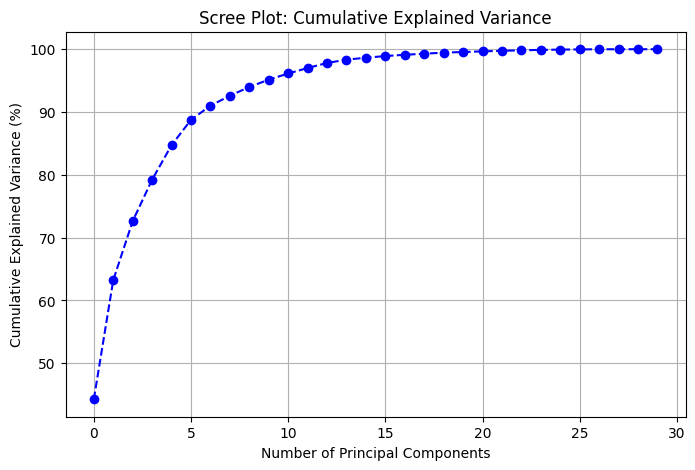

Number of components to retain 95% variance: 10
🔹 Accuracy on Original Data: 0.9708
🔹 Accuracy on PCA-Transformed Data (95% variance): 0.9474


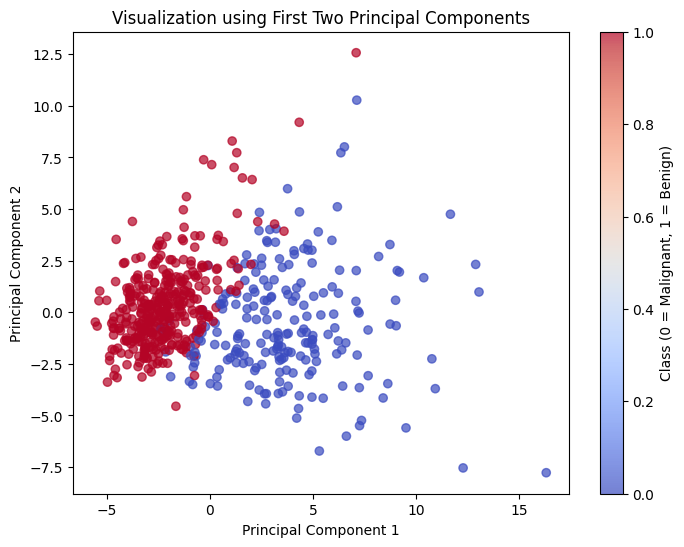

In [2]:
#Question 8 : PCA + KNN with Variance Analysis and Visualization
#Task:
#1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
#2. Apply PCA and plot the scree plot (explained variance ratio).
#3. Retain 95% variance and transform the dataset.
#4. Train KNN on the original data and PCA-transformed data, then compare accuracy.
#5. Visualize the first two principal components using a scatter plot (color by class).
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load the Breast Cancer Dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Step 3: Standardize the Data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA (fit all components initially)
pca = PCA()
pca.fit(X_scaled)

# Step 5: Plot Scree Plot (Explained Variance Ratio)
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100, marker='o', linestyle='--', color='b')
plt.title('Scree Plot: Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.grid(True)
plt.show()

# Step 6: Retain 95% Variance
pca_95 = PCA(n_components=0.95)
X_pca = pca_95.fit_transform(X_scaled)
print(f"Number of components to retain 95% variance: {pca_95.n_components_}")

# Step 7: Split into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Step 8: Train KNN on Original Data
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)
y_pred_original = knn_original.predict(X_test)
acc_original = accuracy_score(y_test, y_pred_original)

# Step 9: Train KNN on PCA-Transformed Data
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

# Step 10: Compare Accuracies
print(f"🔹 Accuracy on Original Data: {acc_original:.4f}")
print(f"🔹 Accuracy on PCA-Transformed Data (95% variance): {acc_pca:.4f}")

# Step 11: Visualization — First Two Principal Components
plt.figure(figsize=(8,6))
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

plt.scatter(X_pca_2d[:,0], X_pca_2d[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('Visualization using First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class (0 = Malignant, 1 = Benign)')
plt.show()


🔹 Comparison of Distance Metrics (K=5):
Euclidean Distance MSE: 4989.2901
Manhattan Distance MSE: 5558.4380


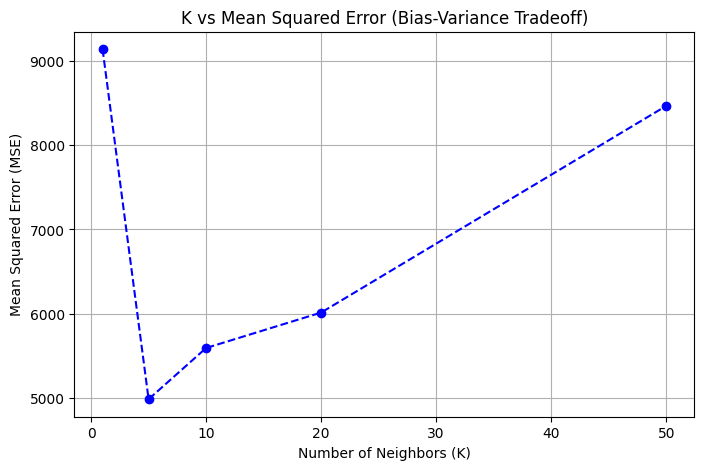

In [3]:
#Question 9:KNN Regressor with Distance Metrics and K-Value Analysis
#Task:
#1. Generate a synthetic regression dataset(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
#2. Train a KNN regressor with:
#a. Euclidean distance (K=5)
#b. Manhattan distance (K=5)
#c. Compare Mean Squared Error (MSE) for both.
#3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Step 2: Generate Synthetic Regression Dataset
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Step 3: Split into Train (70%) and Test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Scale the Features (important for distance-based models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5a: KNN Regressor with Euclidean Distance (K=5)
knn_euclidean = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euclidean.fit(X_train_scaled, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test_scaled)
mse_euclidean = mean_squared_error(y_test, y_pred_euclidean)

# Step 5b: KNN Regressor with Manhattan Distance (K=5)
knn_manhattan = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_manhattan.fit(X_train_scaled, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_scaled)
mse_manhattan = mean_squared_error(y_test, y_pred_manhattan)

# Step 6: Compare MSE for Both Metrics
print("🔹 Comparison of Distance Metrics (K=5):")
print(f"Euclidean Distance MSE: {mse_euclidean:.4f}")
print(f"Manhattan Distance MSE: {mse_manhattan:.4f}")

# Step 7: Analyze Effect of K (Bias-Variance Tradeoff)
k_values = [1, 5, 10, 20, 50]
mse_values = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Step 8: Plot K vs. MSE
plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o', linestyle='--', color='b')
plt.title("K vs Mean Squared Error (Bias-Variance Tradeoff)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(True)
plt.show()


Data Loaded Successfully!

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

🔹 Missing Values Before Imputation:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age           

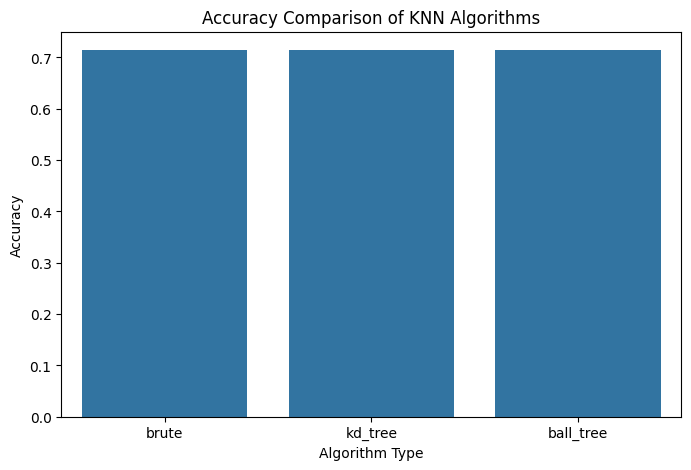


 Best Performing Method: BRUTE


<Figure size 800x600 with 0 Axes>

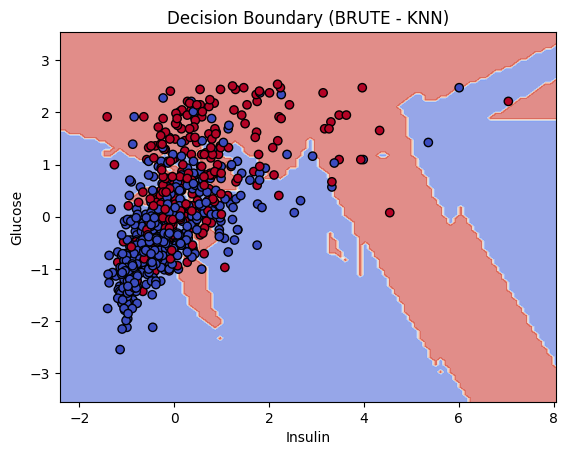

In [9]:
#Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data
#Task:
#1. Load the Pima Indians Diabetes dataset (contains missing values).
#2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
#3. Train KNN using:
#a. Brute-force method
#b. KD-Tree
#c. Ball Tree
#4. Compare their training time and accuracy.
#5. Plot the decision boundary for the best-performing method (use 2 most important features).
#Dataset: Pima Indians Diabetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv"
data = pd.read_csv(url)
print("Data Loaded Successfully!\n")
print(data.head())

# Step 2: Check missing values (Pima dataset has zeros in place of missing)
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_with_missing] = data[cols_with_missing].replace(0, np.nan)

print("\n🔹 Missing Values Before Imputation:\n", data.isnull().sum())

# Step 3: Impute missing values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

print("\n🔹 Missing Values After Imputation:\n", data_imputed.isnull().sum().sum(), "(should be 0)")

# Step 4: Split features and target
X = data_imputed.drop('Outcome', axis=1)
y = data_imputed['Outcome']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 5: Train KNN using different algorithms
methods = ['brute', 'kd_tree', 'ball_tree']
results = {}

for method in methods:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=method)
    knn.fit(X_train, y_train)
    end = time.time()

    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[method] = {'Accuracy': acc, 'Training Time': end - start}

# Step 6: Display comparison
print("\n📊 Comparison of KNN Algorithms:")
for method, metrics in results.items():
    print(f"{method.upper()}: Accuracy = {metrics['Accuracy']:.4f}, Training Time = {metrics['Training Time']:.4f} sec")

# Step 7: Plot bar chart for comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=[v['Accuracy'] for v in results.values()])
plt.title("Accuracy Comparison of KNN Algorithms")
plt.ylabel("Accuracy")
plt.xlabel("Algorithm Type")
plt.show()

# Step 8: Find best-performing algorithm
best_method = max(results, key=lambda x: results[x]['Accuracy'])
print(f"\n Best Performing Method: {best_method.upper()}")

# Step 9: Visualize decision boundary (using top 2 features)
feature_importance = pd.DataFrame({'Feature': data.columns[:-1], 'Mean': np.mean(X, axis=0)})
top2_features = feature_importance.nlargest(2, 'Mean')['Feature'].tolist()

X_vis = data_imputed[top2_features]
y_vis = data_imputed['Outcome']

X_vis_scaled = scaler.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y_vis, test_size=0.2, random_state=42)

best_knn = KNeighborsClassifier(n_neighbors=5, algorithm=best_method)
best_knn.fit(X_train_vis, y_train_vis)

# Decision boundary plot
plt.figure(figsize=(8, 6))
disp = DecisionBoundaryDisplay.from_estimator(
    best_knn, X_vis_scaled, response_method="predict",
    xlabel=top2_features[0], ylabel=top2_features[1],
    cmap=plt.cm.coolwarm, alpha=0.6
)
plt.scatter(X_vis_scaled[:, 0], X_vis_scaled[:, 1], c=y_vis, edgecolor='k', cmap=plt.cm.coolwarm)
plt.title(f"Decision Boundary ({best_method.upper()} - KNN)")
plt.show()
